# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified! 
The chemical compositions are measured as the weight percent in corresponding oxide.

##  Probleam

Identify the Type of Glass on the basis of  given attributes

In [1]:
# Import Librery
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/Users/aditya/opt/anaconda3/envs/datascience_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [65]:
import pandas as pd 
 # read and wrangle dataframes


import matplotlib.pyplot as plt
 # visualization

import seaborn as sns 
# statistical visualizations and aesthetics

from sklearn.base import TransformerMixin 
# To create new classes for transformations

from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
# preprocessing 

from sklearn.decomposition import PCA 
# dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
# data transform

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# model selection modules

from sklearn.pipeline import Pipeline
 # streaming pipelines

from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class

from collections import Counter
import warnings

In [2]:
# Import dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",header=None)

# EXPLORE DATASET

In [3]:
# shape of dataset
df.shape

(214, 11)

Observation 1:- There 214 records in this dataset

In [4]:
# count of null values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Observation 2: There is no missing value.

In [5]:
# (df.columns=[])

In [6]:
# unique value
df[10].unique()

array([1, 2, 3, 5, 6, 7])

Observation 3:- There are 7 types od value in this column

In [7]:
# Checking Data type of Column
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

<AxesSubplot:xlabel='10', ylabel='count'>

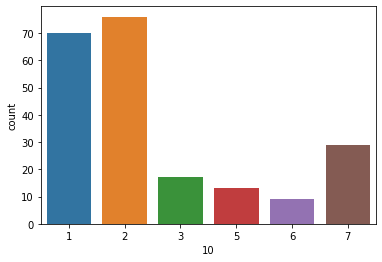

In [8]:
#Counting Number of Values Belonging to each class
df[10].value_counts()

sns.countplot(x=10, data=df)

As we can see The dataset is very very unbalanced.

The occurrences of types 1 and 2 constitute more than 67 % of the glass types.

# Data Preprocessing ( Preparing Dataset)

#### Attribute Information

Add meaningfull column name in header

In [9]:
name=['Id','RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe','glass_type']
df.columns=name
df.head()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
df.shape

(214, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Ai          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


2.Removing unnecessary columns

In [12]:
df.drop('Id',1)

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Statics of Dataset

In [13]:
df.describe()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first

The features are not on the same scale. I.e. Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

## Data Visualization

In [14]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = df[features]

y = df[label]

In [15]:
x2=X.values

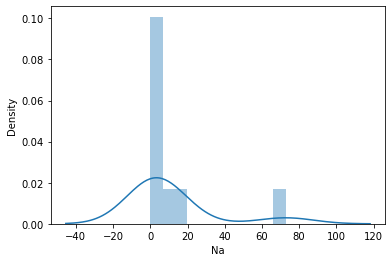

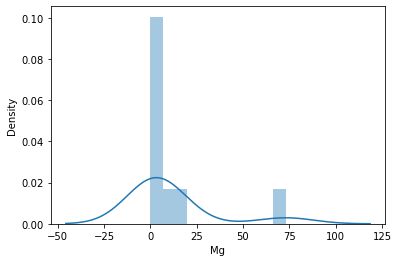

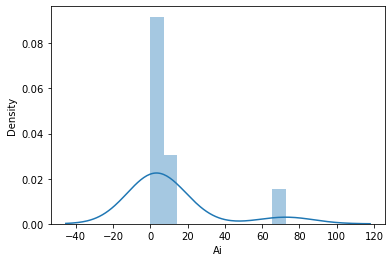

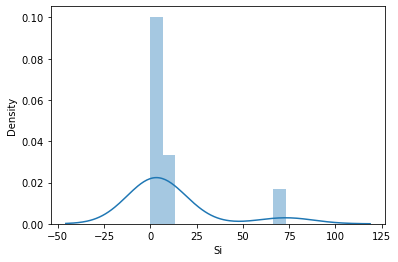

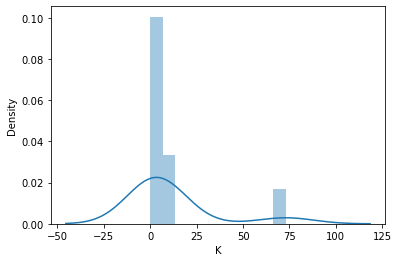

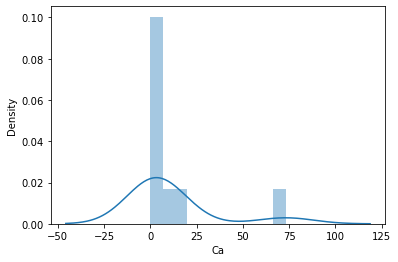

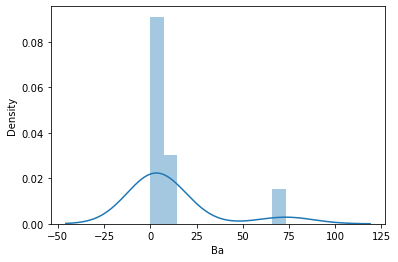

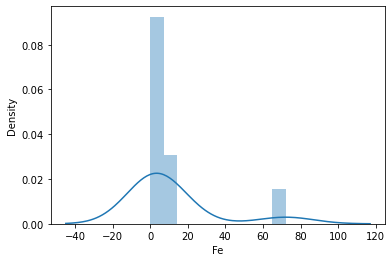

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

Outcomes

1 Our dataset is skewed either on positive side or negative side and data is not normalized

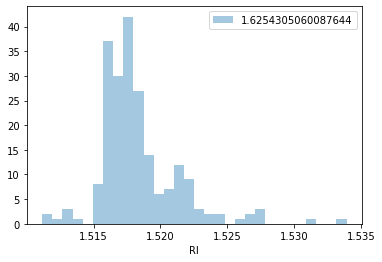

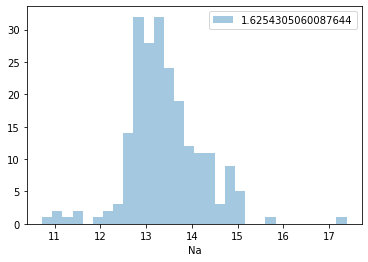

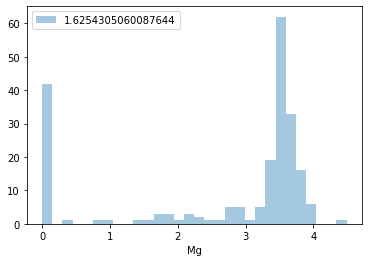

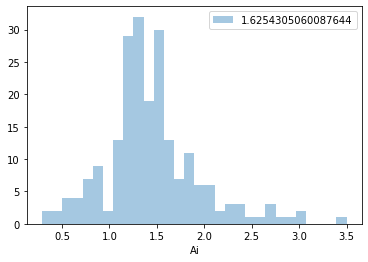

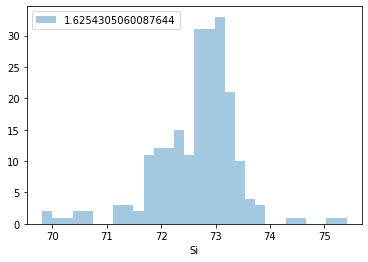

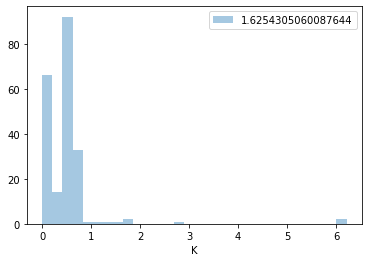

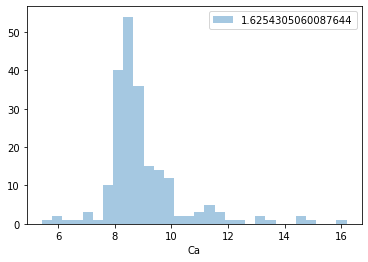

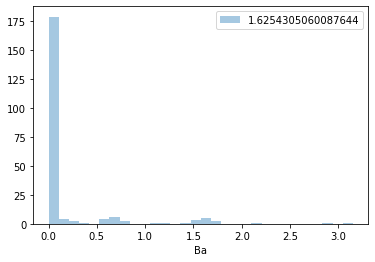

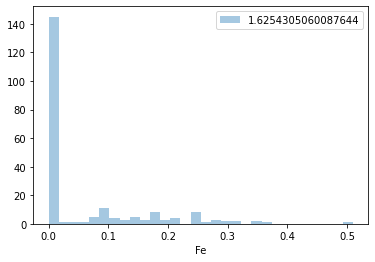

In [17]:
#Trying to gain more Insights about the data

for feat in features:
    skewd=df[features].skew()
    sns.distplot(df[feat],kde=False,label=skewd,bins=30)
    plt.legend(loc='best')
    plt.show()

Using corelation matrix

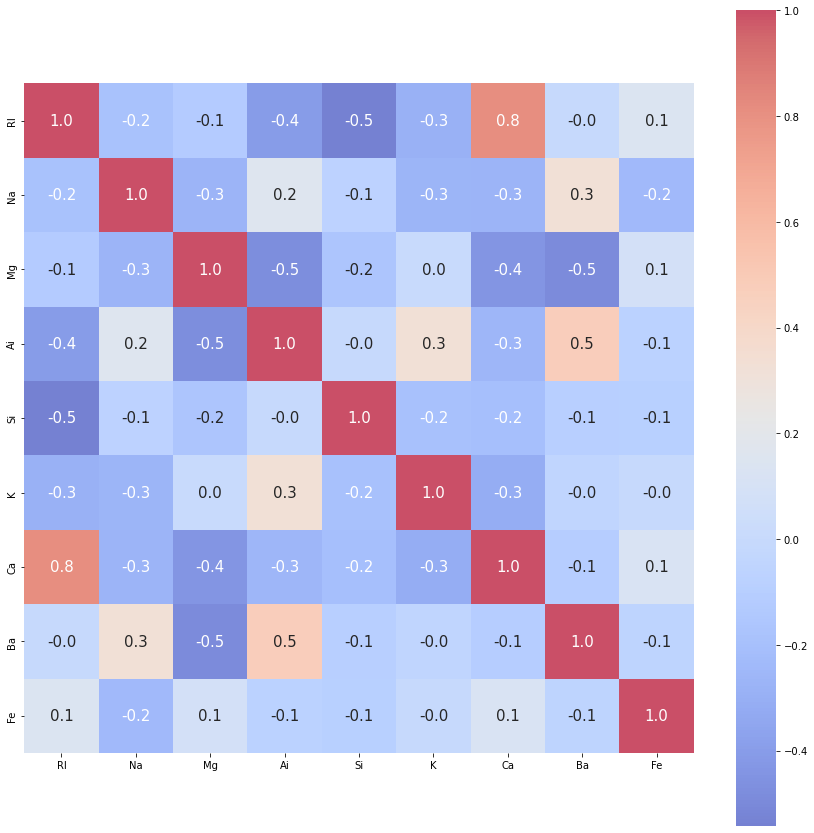

In [18]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

Outcomes

1. AI and Ba have intermediate correlation between each other.
2. RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )

##  Outliers Detection

In [20]:
from collections import Counter

def outlier_hunt(df):
    outlier_indices = []    
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5*IQR
        outlier_list_col=df[(df[col]< Q1-outlier_step)|(df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   


The dataset contains 14 observations with more than 2 outliers


Outcomes

1. In our data, There exists around 14 observations with multiple outliers.
2. These could harm the efficiency of our learning algorithms. We'll remove them now.


# Remove outliers

In [44]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)

(181, 11)


Outcomes

Removing observations with multiple outliers (more than 2) left us with 200 observations to train from.

# Normalising/Scaling the data

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [53]:
y.head(2)

,glass_type
0,1
1,1


In [54]:
# scaling the feature

In [55]:
from sklearn import preprocessing
X=preprocessing.scale(X)

# Visualization of Data after Being Preprocessed

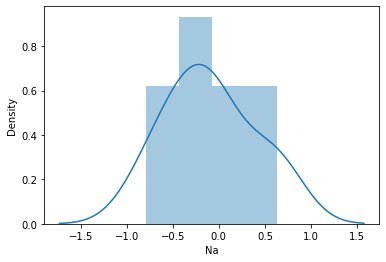

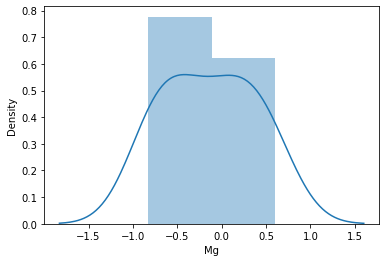

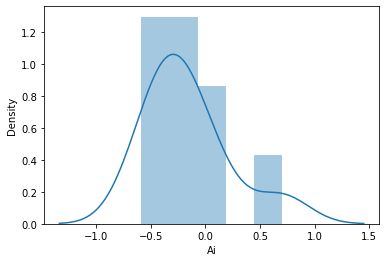

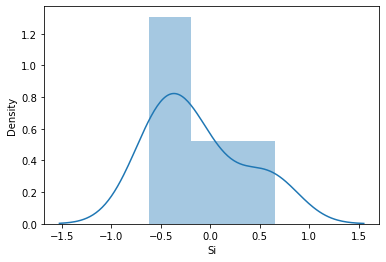

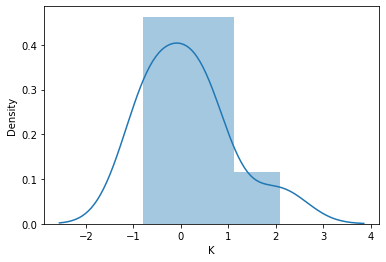

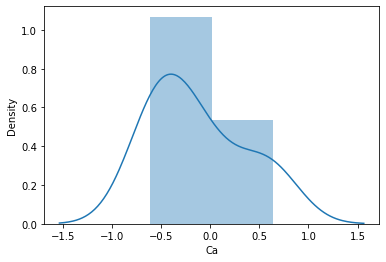

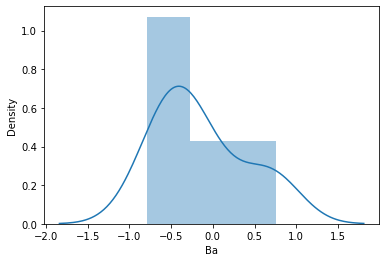

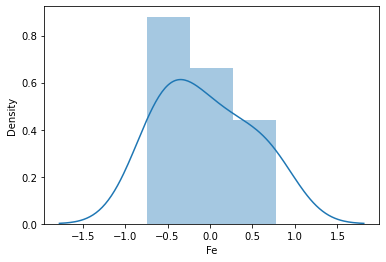

In [56]:
X2 = X
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

Outcomes

According to Diagrams above, After preprocessing,

    1.Skewness is reduced.
    2.Data is more normalized.

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of y_train = (160,)
Shape of y_test = (54,)


# Training Different Machine learning Models

Linera Model Building 

In [71]:
from sklearn.linear_model import LinearRegression 

In [72]:
lr_model=LinearRegression()
pipe=lr_model.fit(X_train,y_train)
prediction=lr_model.predict(X_train)
prediction

array([1.81776208, 4.37443387, 2.23597709, 1.57696264, 1.33472147,
       2.30450054, 2.29773788, 1.19982073, 1.88686585, 1.37509053,
       2.41195045, 2.70970771, 3.41503859, 1.38688073, 4.80535854,
       2.3950338 , 4.38902427, 7.23168018, 1.81372875, 2.08470058,
       2.28936179, 0.41802104, 1.54315664, 1.32505889, 2.55959594,
       1.61991819, 2.0070018 , 1.82609956, 2.0780762 , 3.10353284,
       1.86462792, 5.45171716, 1.6634335 , 1.11498347, 1.91780425,
       1.79966567, 6.81403468, 4.40206946, 1.7002002 , 1.91225764,
       1.92917029, 1.74914664, 3.84272979, 2.1254171 , 1.73111413,
       1.76633952, 1.93414497, 1.93828259, 2.46895504, 6.73967045,
       1.58482253, 2.45202482, 2.17765002, 2.25017524, 1.91203447,
       2.50036619, 2.05396698, 7.32664232, 1.57315816, 2.24451265,
       2.34414642, 1.66484744, 4.21756608, 2.44847447, 1.57869297,
       7.61071381, 1.11432226, 1.76603724, 6.80409299, 1.23377027,
       2.37121519, 2.13156937, 3.60394236, 1.73130592, 2.71293

In [75]:
df.sample()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,glass_type
37,38,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.0,0.0,1


In [84]:
glass_type = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    glass_type = tree.score(X_test,y_test)
    Scores.append(glass_type)

print(tree.score(X_train,y_train))
print(glass_type)

1.0
0.7037037037037037


In [83]:
glass_type = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    glass_type = logistic.score(X_test,y_test)
    Scores.append(glass_type)
    
print(logistic.score(X_train,y_train))
print(glass_type)

0.65
0.6296296296296297


In [85]:
glass_type = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    glass_type.append(score)

print(svc.score(X_train,y_train))
print(glass_type)

0.76875
[0.7407407407407407]
